# Análisis y gestión de nulos de las columnas categoricas

In [1]:
import pandas as pd
import sys
sys.path.append("..")
from src import sp_analisis as an, sp_visualizacion as vis, sp_limpieza as lim
pd.set_option('display.max_columns', None)


In [2]:
# Leemos el archivo de datos limpio manteniendo el formato de fecha en las columnas date y dt_customer
df = pd.read_csv("../data/data-clean.csv", parse_dates=['date', 'dt_customer'])
df.sample()


,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,date,id,dt_customer,numwebvisitsmonth,contact_year,contact_month,customer_year,customer_month,subscribed,duration_min,have_children,income_type
9163,31.0,technician,married,professional.course,no,no,no,telephone,2,-1,0,nonexistent,1.4,94.465,-41,4.967,5228,2016-07-24,678eaad5-d8a5-46c4-9010-d7e049cdb011,2012-09-25,23,2016.0,7.0,2012,9,no,2.72,yes,superior


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   age                37880 non-null  float64       
 1   job                42655 non-null  object        
 2   marital            42915 non-null  object        
 3   education          41193 non-null  object        
 4   default            34019 non-null  object        
 5   housing            41974 non-null  object        
 6   loan               41974 non-null  object        
 7   contact            43000 non-null  object        
 8   campaign           43000 non-null  int64         
 9   pdays              43000 non-null  int64         
 10  previous           43000 non-null  int64         
 11  poutcome           43000 non-null  object        
 12  emp_var_rate       43000 non-null  float64       
 13  cons_price_idx     42529 non-null  float64       
 14  cons_c

## Análisis de las columnas

In [4]:
an.analisis_general_categoricas(df)

Distribución de la columna JOB
    12 valores únicos


job
admin.           0.254906
blue-collar      0.226328
technician       0.164717
services         0.097574
management       0.071504
retired          0.041965
entrepreneur     0.035682
self-employed    0.034908
housemaid        0.026328
unemployed       0.024921
student          0.021170
Name: proportion, dtype: float64

    Describe


count      42655
unique        11
top       admin.
freq       10873
Name: job, dtype: object

----------------
Distribución de la columna MARITAL
    4 valores únicos


marital
married     0.605825
single      0.282069
divorced    0.112105
Name: proportion, dtype: float64

    Describe


count       42915
unique          3
top       married
freq        25999
Name: marital, dtype: object

----------------
Distribución de la columna EDUCATION
    8 valores únicos


education
university.degree      0.308839
high.school            0.240939
basic.9y               0.153157
professional.course    0.132959
basic.4y               0.105746
basic.6y               0.057922
illiterate             0.000437
Name: proportion, dtype: float64

    Describe


count                 41193
unique                    7
top       university.degree
freq                  12722
Name: education, dtype: object

----------------
Distribución de la columna DEFAULT
    3 valores únicos


default
no     0.999912
yes    0.000088
Name: proportion, dtype: float64

    Describe


count     34019
unique        2
top          no
freq      34016
Name: default, dtype: object

----------------
Distribución de la columna HOUSING
    3 valores únicos


housing
yes    0.535998
no     0.464002
Name: proportion, dtype: float64

    Describe


count     41974
unique        2
top         yes
freq      22498
Name: housing, dtype: object

----------------
Distribución de la columna LOAN
    3 valores únicos


loan
no     0.84438
yes    0.15562
Name: proportion, dtype: float64

    Describe


count     41974
unique        2
top          no
freq      35442
Name: loan, dtype: object

----------------
Distribución de la columna CONTACT
    2 valores únicos


contact
cellular     0.637116
telephone    0.362884
Name: proportion, dtype: float64

    Describe


count        43000
unique           2
top       cellular
freq         27396
Name: contact, dtype: object

----------------
Distribución de la columna POUTCOME
    3 valores únicos


poutcome
nonexistent    0.862860
failure        0.103744
success        0.033395
Name: proportion, dtype: float64

    Describe


count           43000
unique              3
top       nonexistent
freq            37103
Name: poutcome, dtype: object

----------------
Distribución de la columna ID
    43000 valores únicos


id
993bbbd6-4dbc-4a40-a408-f91f8462bee6    0.000023
089b39d8-e4d0-461b-87d4-814d71e0e079    0.000023
e9d37224-cb6f-4942-98d7-46672963d097    0.000023
3f9f49b5-e410-4948-bf6e-f9244f04918b    0.000023
9991fafb-4447-451a-8be2-b0df6098d13e    0.000023
                                          ...   
66a752e2-b2f1-440c-9a8f-cc3b10d74dd0    0.000023
ca5c0d7a-8bbd-42b3-8351-1074c5be011a    0.000023
8d700df5-0c33-4517-8cf8-92e1c92c9c12    0.000023
ea6b7d04-9271-4c0a-a01f-07795d164aba    0.000023
87b79988-2be5-419d-88f4-56655852c565    0.000023
Name: proportion, Length: 43000, dtype: float64

    Describe


count                                    43000
unique                                   43000
top       993bbbd6-4dbc-4a40-a408-f91f8462bee6
freq                                         1
Name: id, dtype: object

----------------
Distribución de la columna SUBSCRIBED
    2 valores únicos


subscribed
no     0.887349
yes    0.112651
Name: proportion, dtype: float64

    Describe


count     43000
unique        2
top          no
freq      38156
Name: subscribed, dtype: object

----------------
Distribución de la columna HAVE_CHILDREN
    2 valores únicos


have_children
yes    0.889442
no     0.110558
Name: proportion, dtype: float64

    Describe


count     43000
unique        2
top         yes
freq      38246
Name: have_children, dtype: object

----------------
Distribución de la columna INCOME_TYPE
    3 valores únicos


income_type
high        0.401116
low         0.367674
superior    0.231209
Name: proportion, dtype: float64

    Describe


count     43000
unique        3
top        high
freq      17248
Name: income_type, dtype: object

----------------


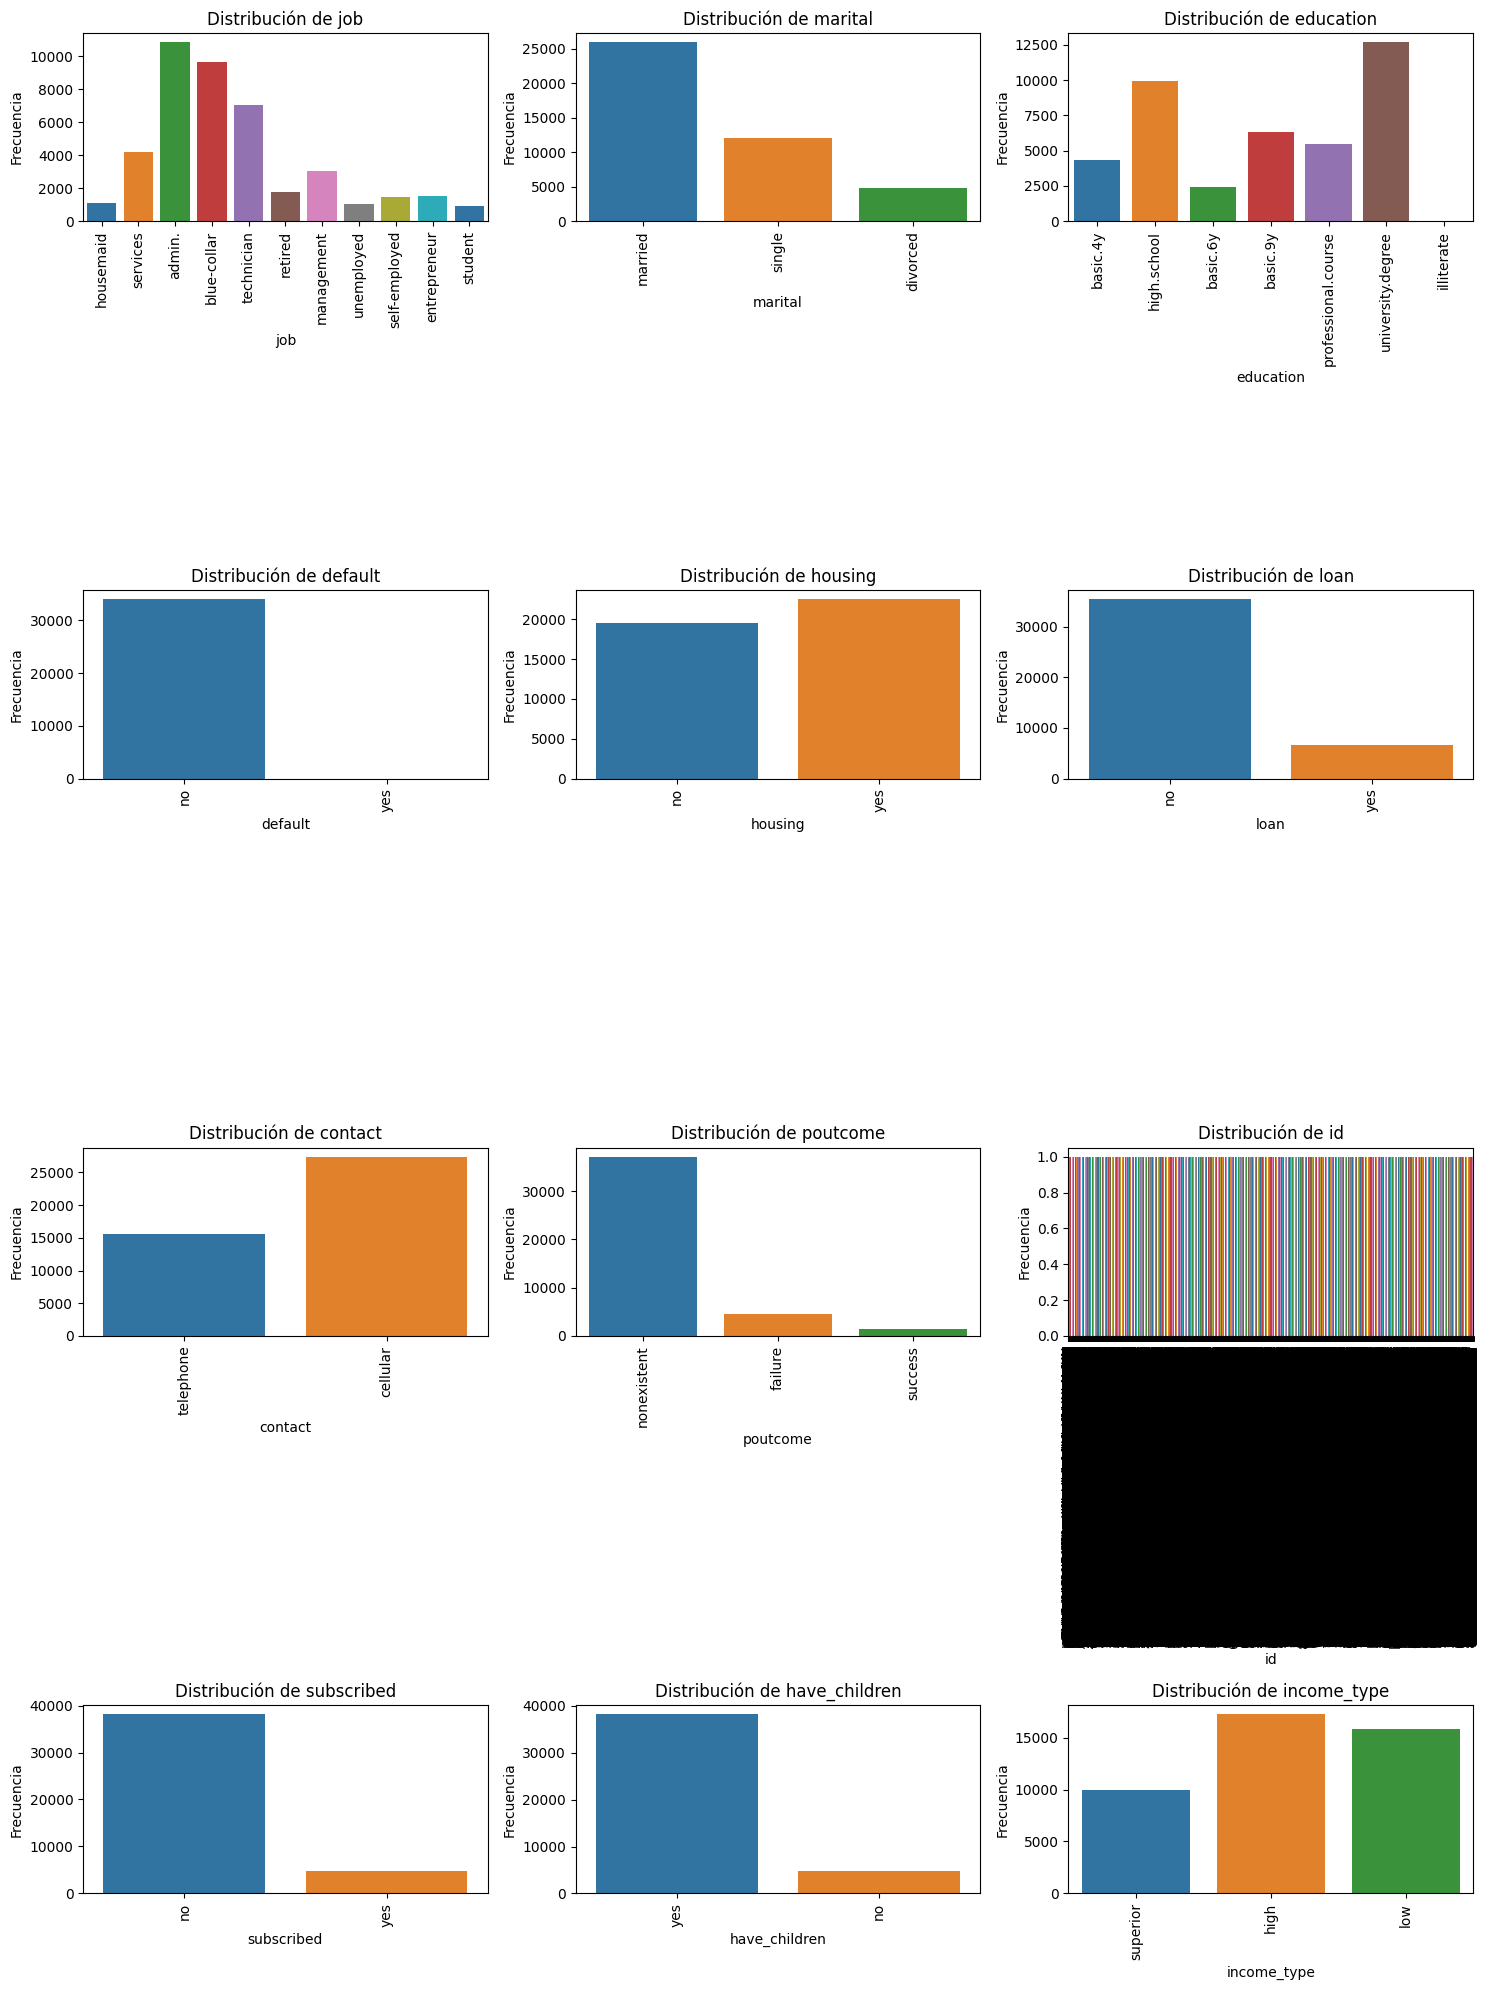

In [ ]:
# Vemos los subplots de las categóricas
 #seleccionamos columnas categóricas
col_cat = df.select_dtypes(include=['object', 'category']).columns
col_cat.drop('id')
vis.subplot_col_cat(df, col_cat)

## Gestión de nulos de categóricas

In [6]:
df_cat = df[df.select_dtypes(include='O').columns].copy()
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   job            42655 non-null  object
 1   marital        42915 non-null  object
 2   education      41193 non-null  object
 3   default        34019 non-null  object
 4   housing        41974 non-null  object
 5   loan           41974 non-null  object
 6   contact        43000 non-null  object
 7   poutcome       43000 non-null  object
 8   id             43000 non-null  object
 9   subscribed     43000 non-null  object
 10  have_children  43000 non-null  object
 11  income_type    43000 non-null  object
dtypes: object(12)
memory usage: 3.9+ MB


In [7]:
an.calcular_nulos(df_cat)[1]

job               0.802326
marital           0.197674
education         4.202326
default          20.886047
housing           2.386047
loan              2.386047
contact           0.000000
poutcome          0.000000
id                0.000000
subscribed        0.000000
have_children     0.000000
income_type       0.000000
dtype: float64

Vemos que no tenemos ninguna columna con una cantidad de nulos por encima del 50%. Vamos a gestionar los nulos.

In [8]:
#Tenemos que elegir con que valores rellenamos
an.analisis_general_categoricas(df_cat)

Distribución de la columna JOB
    12 valores únicos


job
admin.           0.254906
blue-collar      0.226328
technician       0.164717
services         0.097574
management       0.071504
retired          0.041965
entrepreneur     0.035682
self-employed    0.034908
housemaid        0.026328
unemployed       0.024921
student          0.021170
Name: proportion, dtype: float64

    Describe


count      42655
unique        11
top       admin.
freq       10873
Name: job, dtype: object

----------------
Distribución de la columna MARITAL
    4 valores únicos


marital
married     0.605825
single      0.282069
divorced    0.112105
Name: proportion, dtype: float64

    Describe


count       42915
unique          3
top       married
freq        25999
Name: marital, dtype: object

----------------
Distribución de la columna EDUCATION
    8 valores únicos


education
university.degree      0.308839
high.school            0.240939
basic.9y               0.153157
professional.course    0.132959
basic.4y               0.105746
basic.6y               0.057922
illiterate             0.000437
Name: proportion, dtype: float64

    Describe


count                 41193
unique                    7
top       university.degree
freq                  12722
Name: education, dtype: object

----------------
Distribución de la columna DEFAULT
    3 valores únicos


default
no     0.999912
yes    0.000088
Name: proportion, dtype: float64

    Describe


count     34019
unique        2
top          no
freq      34016
Name: default, dtype: object

----------------
Distribución de la columna HOUSING
    3 valores únicos


housing
yes    0.535998
no     0.464002
Name: proportion, dtype: float64

    Describe


count     41974
unique        2
top         yes
freq      22498
Name: housing, dtype: object

----------------
Distribución de la columna LOAN
    3 valores únicos


loan
no     0.84438
yes    0.15562
Name: proportion, dtype: float64

    Describe


count     41974
unique        2
top          no
freq      35442
Name: loan, dtype: object

----------------
Distribución de la columna CONTACT
    2 valores únicos


contact
cellular     0.637116
telephone    0.362884
Name: proportion, dtype: float64

    Describe


count        43000
unique           2
top       cellular
freq         27396
Name: contact, dtype: object

----------------
Distribución de la columna POUTCOME
    3 valores únicos


poutcome
nonexistent    0.862860
failure        0.103744
success        0.033395
Name: proportion, dtype: float64

    Describe


count           43000
unique              3
top       nonexistent
freq            37103
Name: poutcome, dtype: object

----------------
Distribución de la columna ID
    43000 valores únicos


id
993bbbd6-4dbc-4a40-a408-f91f8462bee6    0.000023
089b39d8-e4d0-461b-87d4-814d71e0e079    0.000023
e9d37224-cb6f-4942-98d7-46672963d097    0.000023
3f9f49b5-e410-4948-bf6e-f9244f04918b    0.000023
9991fafb-4447-451a-8be2-b0df6098d13e    0.000023
                                          ...   
66a752e2-b2f1-440c-9a8f-cc3b10d74dd0    0.000023
ca5c0d7a-8bbd-42b3-8351-1074c5be011a    0.000023
8d700df5-0c33-4517-8cf8-92e1c92c9c12    0.000023
ea6b7d04-9271-4c0a-a01f-07795d164aba    0.000023
87b79988-2be5-419d-88f4-56655852c565    0.000023
Name: proportion, Length: 43000, dtype: float64

    Describe


count                                    43000
unique                                   43000
top       993bbbd6-4dbc-4a40-a408-f91f8462bee6
freq                                         1
Name: id, dtype: object

----------------
Distribución de la columna SUBSCRIBED
    2 valores únicos


subscribed
no     0.887349
yes    0.112651
Name: proportion, dtype: float64

    Describe


count     43000
unique        2
top          no
freq      38156
Name: subscribed, dtype: object

----------------
Distribución de la columna HAVE_CHILDREN
    2 valores únicos


have_children
yes    0.889442
no     0.110558
Name: proportion, dtype: float64

    Describe


count     43000
unique        2
top         yes
freq      38246
Name: have_children, dtype: object

----------------
Distribución de la columna INCOME_TYPE
    3 valores únicos


income_type
high        0.401116
low         0.367674
superior    0.231209
Name: proportion, dtype: float64

    Describe


count     43000
unique        3
top        high
freq      17248
Name: income_type, dtype: object

----------------


In [9]:
an.visualizar_nulos_categoricas(df_cat)

,Columns,DataType,Num_nulls,%_null,Change_value,Change_By,%
0,job,object,345,0.802326,False,admin.,0.254906
1,marital,object,85,0.197674,False,married,0.605825
2,education,object,1807,4.202326,False,university.degree,0.308839
3,default,object,8981,20.886047,False,no,0.999912
4,housing,object,1026,2.386047,False,yes,0.535998
5,loan,object,1026,2.386047,True,no,0.844380


(['default'], ['job', 'marital', 'education', 'housing', 'loan'])

Analizamos las columnas default y loan.
La columna default, tiene un 0.999912 con valores 'no' y un 0.000088 con valores 'yes'. Al tener un 20.88% de valores nulos, decidimos que ese valor es muy alto y rellenaremos con 'unknow'
La columna loan, tiene un 0.84438 con valores 'no' y un 0.15562 con valores 'yes'. Su porcentaje de nulos es de 2.38%, en esta columna si que vamos a rellenar lo valores nulos con 'no'

In [10]:
df_cat["loan"] = df_cat["loan"].fillna(df_cat["loan"].mode()[0])

Para el resto de columnas, rellenamos con "unknown"

In [11]:
df_cat = df_cat.fillna("unkown")

In [12]:
df[df.select_dtypes(include='O').columns] = df_cat

In [13]:
an.calcular_nulos(df)

(age                  5120
 job                     0
 marital                 0
 education               0
 default                 0
 housing                 0
 loan                    0
 contact                 0
 campaign                0
 pdays                   0
 previous                0
 poutcome                0
 emp_var_rate            0
 cons_price_idx        471
 cons_conf_idx           0
 euribor3m            9256
 nr_employed             0
 date                  248
 id                      0
 dt_customer             0
 numwebvisitsmonth       0
 contact_year          248
 contact_month         248
 customer_year           0
 customer_month          0
 subscribed              0
 duration_min            0
 have_children           0
 income_type             0
 dtype: int64,
 age                  11.906977
 job                   0.000000
 marital               0.000000
 education             0.000000
 default               0.000000
 housing               0.000000
 loan     

In [14]:
#Guardamos avances
df.to_csv("../data/data-clean.csv", index=False)